In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder


# --- 1. Data Import and Cleaning ---
print("--- 1. Data Import and Cleaning ---")

# Load the dataset
df = pd.read_csv("C:/Users/chauh/Downloads/Global_Pollution_Analysis.csv")
print(f"Dataset loaded successfully. Initial shape: {df.shape}")


--- 1. Data Import and Cleaning ---
Dataset loaded successfully. Initial shape: (200, 13)


In [6]:

# Assuming your DataFrame is named 'df'
column_list = df.columns.tolist()

print(column_list)

['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)', 'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)', 'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)', 'GDP_Per_Capita (in USD)']


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# --- Define ALL Column Names ---
CO2_EMISSIONS = 'CO2_Emissions (in MT)'
INDUSTRIAL_WASTE = 'Industrial_Waste (in tons)'
COUNTRY = 'Country'
YEAR = 'Year'

# List of all numerical columns that need cleaning and may benefit from scaling
NUMERICAL_IMPUTATION_COLS = [
    'Air_Pollution_Index', 
    'Water_Pollution_Index', 
    'Soil_Pollution_Index', 
    INDUSTRIAL_WASTE, 
    'Energy_Recovered (in GWh)', 
    CO2_EMISSIONS, 
    'Renewable_Energy (%)', 
    'Plastic_Waste_Produced (in tons)', 
    'Energy_Consumption_Per_Capita (in MWh)', 
    'Population (in millions)', 
    'GDP_Per_Capita (in USD)'
]

# --- 2. Handle Missing Data and Outliers (Imputation) ---
print("--- 2. Handling Missing Data ---")

# Strategy: Use the MEDIAN for numerical features, as it's robust to outliers.
for col in NUMERICAL_IMPUTATION_COLS:
    if col in df.columns:
        # Check if the column is numerical before calculating the median
        if df[col].dtype in ['int64', 'float64']:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"-> Filled NaNs in '{col}' with median: {median_val:.2f}")
        else:
            # Handle non-numerical columns (e.g., text/object) with mode if needed
            if df[col].isnull().any():
                mode_val = df[col].mode()[0]
                df[col].fillna(mode_val, inplace=True)
                print(f"-> Filled NaNs in non-numeric '{col}' with mode: {mode_val}")

print("\nMissing values handled using median/mode imputation.")

# --- 3. Data Transformation (Scaling and Encoding) ---
print("\n--- 3. Data Transformation ---")

### A. Normalize/Standardize Features
scaler = StandardScaler()
features_to_scale = [CO2_EMISSIONS, INDUSTRIAL_WASTE]

for col in features_to_scale:
    if col in df.columns:
        # Scale the features (transform to mean=0, std=1)
        # Reshape is needed as StandardScaler expects a 2D array
        df[f'{col}_Scaled'] = scaler.fit_transform(df[col].values.reshape(-1, 1))
        print(f"Feature '{col}' standardized.")

### B. Encode Categorical Features
encoder = LabelEncoder()
categorical_features_to_encode = [COUNTRY, YEAR]

for col in categorical_features_to_encode:
    if col in df.columns:
        # Label Encoding converts categories into sequential integers (0, 1, 2, ...)
        df[f'{col}_Encoded'] = encoder.fit_transform(df[col].astype(str))
        print(f"Feature '{col}' encoded using LabelEncoder.")

print(f"\n Data cleaning and transformation complete. Ready for modeling!")

--- 2. Handling Missing Data ---
-> Filled NaNs in 'Air_Pollution_Index' with median: 183.38
-> Filled NaNs in 'Water_Pollution_Index' with median: 112.31
-> Filled NaNs in 'Soil_Pollution_Index' with median: 78.60
-> Filled NaNs in 'Industrial_Waste (in tons)' with median: 55299.15
-> Filled NaNs in 'Energy_Recovered (in GWh)' with median: 273.14
-> Filled NaNs in 'CO2_Emissions (in MT)' with median: 25.36
-> Filled NaNs in 'Renewable_Energy (%)' with median: 29.17
-> Filled NaNs in 'Plastic_Waste_Produced (in tons)' with median: 24121.54
-> Filled NaNs in 'Energy_Consumption_Per_Capita (in MWh)' with median: 9.22
-> Filled NaNs in 'Population (in millions)' with median: 104.97
-> Filled NaNs in 'GDP_Per_Capita (in USD)' with median: 35043.32

Missing values handled using median/mode imputation.

--- 3. Data Transformation ---
Feature 'CO2_Emissions (in MT)' standardized.
Feature 'Industrial_Waste (in tons)' standardized.
Feature 'Country' encoded using LabelEncoder.
Feature 'Year' en

C:\Users\chauh\AppData\Local\Temp\ipykernel_15136\3825408262.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\chauh\AppData\Local\Temp\ipykernel_15136\3825408262.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Define Key Column Names ---
AIR_POLLUTION = 'Air_Pollution_Index'
WATER_POLLUTION = 'Water_Pollution_Index'
SOIL_POLLUTION = 'Soil_Pollution_Index'
YEAR = 'Year'
ENERGY_PER_CAPITA = 'Energy_Consumption_Per_Capita (in MWh)'
POPULATION = 'Population (in millions)' # Required if Energy per capita needs recalculation

# --- 1. Create New Features (Feature Engineering) ---
print("--- 1. Creating New Features ---")

# A. Yearly Pollution Trends (Years Since Start)
# This captures the overall progression of environmental factors over time.
if YEAR in df.columns:
    df[YEAR] = pd.to_numeric(df[YEAR], errors='coerce') # Ensure year is numeric
    min_year = df[YEAR].min()
    df['Years_Since_Start'] = df[YEAR] - min_year
    print(f"Feature 'Years_Since_Start' created (starting from {min_year}).")
else:
    print(f"Warning: Column '{YEAR}' not found for trend creation.")

# B. Energy Consumption per Capita
# Your dataset already includes 'Energy_Consumption_Per_Capita (in MWh)', 
# so we will create a clean alias for modeling simplicity.
if ENERGY_PER_CAPITA in df.columns:
    df['Energy_Per_Capita_MWh'] = df[ENERGY_PER_CAPITA]
    print(f"Feature 'Energy_Per_Capita_MWh' aliased from existing column.")
else:
    # Fallback: Calculate if you have 'Total_Energy_Consumption' and 'Population'
    print(f"Warning: Column '{ENERGY_PER_CAPITA}' not found. Skipping alias.")


# --- 2. Apply Feature Scaling to Pollution Indices ---
print("\n--- 2. Scaling Pollution Indices ---")

scaler = StandardScaler()
pollution_indices_to_scale = [AIR_POLLUTION, WATER_POLLUTION, SOIL_POLLUTION]

for col in pollution_indices_to_scale:
    if col in df.columns:
        # Scale the features (transform to mean=0, std=1)
        # This is essential so the indices don't disproportionately influence the model.
        df[f'{col}_Scaled'] = scaler.fit_transform(df[col].values.reshape(-1, 1))
        print(f"Feature '{col}' scaled.")
    else:
        print(f"Warning: Pollution Index '{col}' not found for scaling.")

print(f"\nFeature Engineering and Scaling complete. Final DataFrame shape: {df.shape}")

--- 1. Creating New Features ---
Feature 'Years_Since_Start' created (starting from 2000).
Feature 'Energy_Per_Capita_MWh' aliased from existing column.

--- 2. Scaling Pollution Indices ---
Feature 'Air_Pollution_Index' scaled.
Feature 'Water_Pollution_Index' scaled.
Feature 'Soil_Pollution_Index' scaled.

Feature Engineering and Scaling complete. Final DataFrame shape: (200, 22)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Define Key Columns and Target Creation ---
AIR_POLLUTION = 'Air_Pollution_Index'
CO2_SCALED = 'CO2_Emissions (in MT)_Scaled'

# 1. Create the Multi-Class Target Variable (Pollution Severity: Low, Medium, High)
# Calculate Tertiles (33.3% and 66.6% quantiles) based on Air Pollution Index
q_low = df[AIR_POLLUTION].quantile(0.333)
q_high = df[AIR_POLLUTION].quantile(0.666)

def categorize_pollution(index):
    if index <= q_low:
        return 'Low'
    elif index <= q_high:
        return 'Medium'
    else:
        return 'High'

df['Pollution_Severity'] = df[AIR_POLLUTION].apply(categorize_pollution)

# 2. Encode the Target Variable (0, 1, 2)
le_target = LabelEncoder()
df['Severity_Encoded'] = le_target.fit_transform(df['Pollution_Severity'])
class_names = le_target.classes_ # Get class names for reporting

# --- 3. Define Final Feature Set (X) and Target (y) ---
# Use encoded/scaled features where available.
FEATURE_COLS = [
    'Air_Pollution_Index_Scaled', # Assuming you scaled the indices previously
    'Water_Pollution_Index_Scaled',
    'Soil_Pollution_Index_Scaled',
    'Industrial_Waste (in tons)_Scaled',
    CO2_SCALED,
    'Renewable_Energy (%)', 
    'Plastic_Waste_Produced (in tons)', 
    'Energy_Consumption_Per_Capita (in MWh)', 
    'GDP_Per_Capita (in USD)',
    'Years_Since_Start', # Engineered feature
    'Year_Encoded'
]

# Ensure only existing and non-target features are included
FEATURE_COLS = [col for col in FEATURE_COLS if col in df.columns]

X = df[FEATURE_COLS].copy()
y = df['Severity_Encoded']

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

--- Naive Bayes Classifier Implementation ---
Data scaled to [0, 1] range for Multinomial Naive Bayes compatibility.

Training Multinomial Naive Bayes model...
Prediction complete.

--- Multinomial Naive Bayes Model Evaluation ---
Accuracy: 0.6250

Classification Report:
              precision    recall  f1-score   support

        High       0.75      0.64      0.69        14
         Low       0.71      0.77      0.74        13
      Medium       0.43      0.46      0.44        13

    accuracy                           0.62        40
   macro avg       0.63      0.62      0.63        40
weighted avg       0.63      0.62      0.63        40



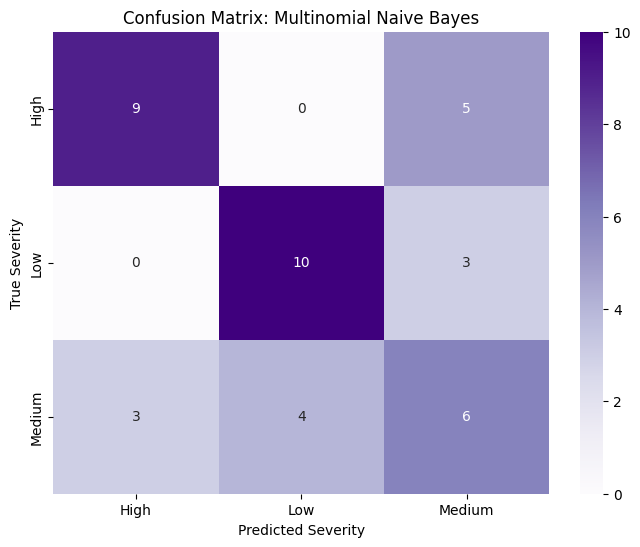

In [11]:
from sklearn.preprocessing import MinMaxScaler

print("--- Naive Bayes Classifier Implementation ---")

# 1. Adapt Data for MNB (Shift features to be non-negative)
# MNB requires non-negative features. We'll use MinMaxScaler to scale data between 0 and 1.
mnb_scaler = MinMaxScaler()

# Fit the scaler only on the training data
X_train_mnb = mnb_scaler.fit_transform(X_train)
X_test_mnb = mnb_scaler.transform(X_test)
print("Data scaled to [0, 1] range for Multinomial Naive Bayes compatibility.")


# 2. Model Implementation and Prediction
mnb_model = MultinomialNB()

print("\nTraining Multinomial Naive Bayes model...")
mnb_model.fit(X_train_mnb, y_train)

# Predict on the test set
y_pred_mnb = mnb_model.predict(X_test_mnb)
print("Prediction complete.")


# 3. Evaluation Metrics and Confusion Matrix
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

print("\n--- Multinomial Naive Bayes Model Evaluation ---")
print(f"Accuracy: {accuracy_mnb:.4f}")

# Classification Report provides Precision, Recall, and F1-score for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mnb, target_names=class_names, zero_division=0))


# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Purples', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.title('Confusion Matrix: Multinomial Naive Bayes')
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse X_train, y_train, X_test, y_test from the previous step

print("--- 1. Hyperparameter Tuning (Finding Optimal K) ---")

# Define the model
knn = KNeighborsClassifier()

# Define the range of K values to test (e.g., K from 1 to 20)
# K should generally be odd for binary/multi-class problems to avoid ties.
param_grid = {'n_neighbors': np.arange(1, 21, 2)}

# Initialize GridSearchCV (5-fold cross-validation is standard)
# We tune based on 'accuracy'
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
# NOTE: KNN benefits greatly from the Standard Scaled data (X_train)
knn_cv.fit(X_train, y_train) 

# Get the optimal K value
optimal_k = knn_cv.best_params_['n_neighbors']

print(f"\nOptimal number of neighbors (K): {optimal_k}")
print(f"Best cross-validation score: {knn_cv.best_score_:.4f}")

--- 1. Hyperparameter Tuning (Finding Optimal K) ---

Optimal number of neighbors (K): 7
Best cross-validation score: 0.3688


In [13]:
# Initialize and train the final KNN model with the optimal K
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

print("\nTraining final KNN model...")
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)
print("Prediction complete.")


Training final KNN model...
Prediction complete.



--- K-Nearest Neighbors Model Evaluation ---
Optimal K used: 7
Accuracy: 0.2250

Classification Report:
              precision    recall  f1-score   support

        High       0.20      0.14      0.17        14
         Low       0.31      0.38      0.34        13
      Medium       0.14      0.15      0.15        13

    accuracy                           0.23        40
   macro avg       0.22      0.23      0.22        40
weighted avg       0.22      0.23      0.22        40



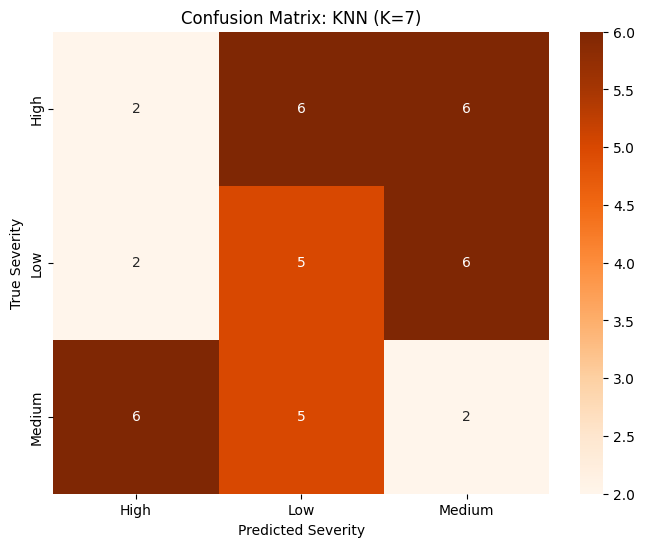

In [14]:
# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("\n--- K-Nearest Neighbors Model Evaluation ---")
print(f"Optimal K used: {optimal_k}")
print(f"Accuracy: {accuracy_knn:.4f}")

# Classification Report provides Precision, Recall, and F1-score for each class
print("\nClassification Report:")
# Use the class_names defined in the preparation step (e.g., ['High', 'Low', 'Medium'])
print(classification_report(y_test, y_pred_knn, target_names=class_names, zero_division=0))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.title(f'Confusion Matrix: KNN (K={optimal_k})')
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse X_train, y_train, X_test, y_test and class_names from the previous steps

print("--- 1. Hyperparameter Tuning (Pruning the Tree) ---")

# Define the model
dtree = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    # Max depth limits the depth of the tree (pruning)
    'max_depth': [3, 5, 7, 10, 15], 
    # Minimum number of samples required to split an internal node
    'min_samples_split': [2, 5, 10, 20] 
}

# Initialize GridSearchCV (using 5-fold cross-validation, optimizing for accuracy)
dtree_cv = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
dtree_cv.fit(X_train, y_train)

# Get the optimal parameters
optimal_params = dtree_cv.best_params_
print(f"\nOptimal pruning parameters: {optimal_params}")
print(f"Best cross-validation score: {dtree_cv.best_score_:.4f}")

--- 1. Hyperparameter Tuning (Pruning the Tree) ---

Optimal pruning parameters: {'max_depth': 3, 'min_samples_split': 2}
Best cross-validation score: 1.0000


In [16]:
# Initialize and train the final Decision Tree model with optimal parameters
dt_model = DecisionTreeClassifier(
    max_depth=optimal_params['max_depth'],
    min_samples_split=optimal_params['min_samples_split'],
    random_state=42
)

print("\nTraining final Decision Tree model...")
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)
print("Prediction complete.")


Training final Decision Tree model...
Prediction complete.



--- Decision Tree Model Evaluation ---
Optimal max_depth: 3
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        14
         Low       1.00      1.00      1.00        13
      Medium       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



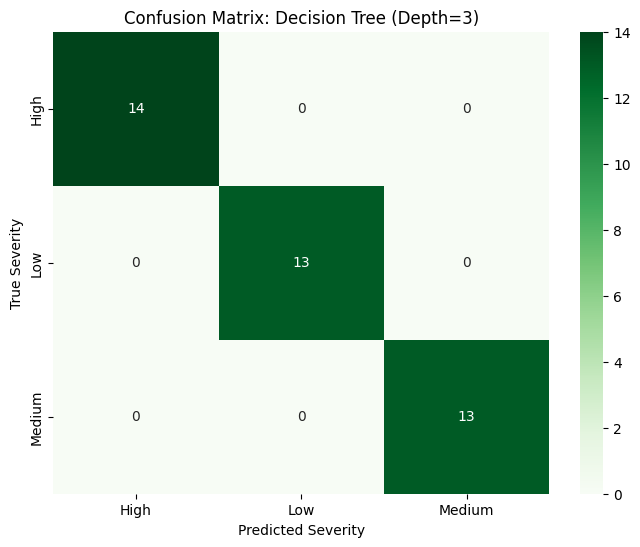


Decision Tree Feature Importance (Top 5):
                             Feature  Importance
0         Air_Pollution_Index_Scaled         1.0
1       Water_Pollution_Index_Scaled         0.0
2        Soil_Pollution_Index_Scaled         0.0
3  Industrial_Waste (in tons)_Scaled         0.0
4       CO2_Emissions (in MT)_Scaled         0.0


In [17]:
# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("\n--- Decision Tree Model Evaluation ---")
print(f"Optimal max_depth: {optimal_params['max_depth']}")
print(f"Accuracy: {accuracy_dt:.4f}")

# Classification Report provides Precision, Recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=class_names, zero_division=0))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.title(f'Confusion Matrix: Decision Tree (Depth={optimal_params["max_depth"]})')
plt.show()


# Optional: Feature Importance (Crucial for insights!)
print("\nDecision Tree Feature Importance (Top 5):")
feature_importance = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance.head(5))